### Given two list of x and y coordinates, and a list of errors on y, find the parabola that minimizes the sum of square distances between the parabola and the (x,y) points.

### XLSX TO CSV

In [109]:
import pandas as pd
from IPython.display import display

##Create or empty dati csv
open('dati.csv', 'w').close()

read_file = pd.read_excel(r'datiexx.xlsx')
read_file.to_csv(r'dati.csv', index = False, header=False)
datitestdf = pd.read_csv('dati.csv')

print('\n','DataFrame di dati.csv:','\n')
display(datitestdf)


 DataFrame di dati.csv: 



,15.05,17.37,0.01
0,16.05,17.39,0.01
1,17.05,17.40,0.01
2,18.05,17.42,0.01
3,19.05,17.44,0.01


In [110]:

from sympy import *

import numpy as np
import scipy.stats
import csv
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown
import pandas as pd
from random import randint
xx, yy, aa, bb, cc = symbols('xx yy aa bb cc')

#Livello di criticità es. (.05)
alpha=.05
unma='cm'
unmb='N'
plt.rcParams['figure.figsize'] = [15, 10]

#Inserire titolo asse x:
customxlabel='Altezza immersa (m)'

#Inserire titolo asse y:
customylabel='Spinta di Archimede (N)'

#Inserire titolo del grafico:
customtitle='Titolo del grafico'


In [111]:
###Si comprimono i valori di x tra -1 e 1 : se non serve decommentare l'ultima riga

##Display tables side by side

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
##Create or empty corr and fit csv
open('corr.csv', 'w').close()
open('fit.csv', 'w').close()


#Importo dati.csv con tre colonne (x, y, yerr) in tre liste

data = csv.reader(open('dati.csv', 'r'), delimiter=",", quotechar='|')
lxcol, lycol, lyerrcol = [], [], []

for row in data:
    lxcol.append(row[0])
    lycol.append(row[1])
    lyerrcol.append(row[2])
    
#Converto in array
ydatap = np.asarray(lycol, dtype=np.float64)

yerrp = np.asarray(lyerrcol, dtype=np.float64)
print('')

xdataor = np.asarray(lxcol, dtype=np.float64)
npoint = len(xdataor)
npoint
ax,bx = float(xdataor[0]),float(xdataor[npoint-1])
apx,bpx = 2./(bx-ax),(bx + ax)/(bx - ax)
print(ax)
print(bx)
print(apx)
print(bpx)
xdata = xdataor*apx - bpx
xdata

#xdata=xdataor

ydata = ydatap
yerr = yerrp
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)) : print ("dimensioni vettori disuguali")


15.05
19.05
0.5
8.525


We want to find the parameters $a$ and $b$ of the parabola $y = c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

The minimum condition can be derived expanding $(yy - cc \cdot xx^2 - bb \cdot xx - aa)^2$, and equating the derivatives with respect to $aa$, $bb$, $cc$ to zero. 

### Calcolo delle derivate di X^2

aa**2 + 2*aa*bb*xx + 2*aa*cc*xx**2 - 2*aa*yy + bb**2*xx**2 + 2*bb*cc*xx**3 - 2*bb*xx*yy + cc**2*xx**4 - 2*cc*xx**2*yy + yy**2

2*aa + 2*bb*xx + 2*cc*xx**2 - 2*yy

2*aa*xx + 2*bb*xx**2 + 2*cc*xx**3 - 2*xx*yy

2*aa*xx**2 + 2*bb*xx**3 + 2*cc*xx**4 - 2*xx**2*yy

array([[50000.,     0., 25000.],
       [    0., 25000.,     0.],
       [25000.,     0., 21250.]])

array([[ 4.85714286e-05,  0.00000000e+00, -5.71428571e-05],
       [ 0.00000000e+00,  4.00000000e-05,  0.00000000e+00],
       [-5.71428571e-05,  0.00000000e+00,  1.14285714e-04]])

### Check D^(-1)D = I

array([[ 1.00000000e+00,  0.00000000e+00, -1.20129601e-16],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-7.10694524e-17,  0.00000000e+00,  1.00000000e+00]])

array([8.70200e+05, 8.50000e+02, 4.35125e+05])

array([1.74025714e+01, 3.40000000e-02, 2.85714286e-03])

### Parametri fit

 a =  17.402571428571427
 b =  0.034
 c =  0.002857142857145334



### Varianze ed errori sui parametri


 errore su a =  0.006969320524371696
 errore su b =  0.006324555320336759
 errore su c =  0.010690449676496976



### Chi quadro


 Chi^2 =  0.22857142857152032
 errore standard della stima =  0.003380617018914745



### Calcolo determinazione


coefficiente determinazione =  0.9960784162656128
Parametro a [cm]
Parametro b [N]
Parametro c [cm]
Errore su a [N]
Errore su b [N]
Errore su c [N]
Errore su c [N]
len 5
Chi quadro critico,  5.991464547107979
Chi quadro sospetto,  0.10258658877510106
Esito del test,  Accettato




### Dataframe di correlazione e fit

,Variabile,Valore
0,Parametro a [cm],0.002857
1,Parametro b [N],0.034000
2,Parametro c [cm],17.402571
3,Errore su a [N],0.010690
4,Errore su b [N],0.006325
5,Errore su c [N],0.006969
6,Coeff. di determinaz.,0.996078
,Variabile,Valore
0,Livello di significatività,0.05
1,Gradi di libertà,5.991464547107979






\begin{table}[ht]
\centering
\caption{Dati relativi al fit lineare}
\label{corr531}
\begin{tabular}{lr}
\toprule
            Variabile &    Valore \\
\midrule
     Parametro a [cm] &  0.002857 \\
      Parametro b [N] &  0.034000 \\
     Parametro c [cm] & 17.402571 \\
      Errore su a [N] &  0.010690 \\
      Errore su b [N] &  0.006325 \\
      Errore su c [N] &  0.006969 \\
Coeff. di determinaz. &  0.996078 \\
\bottomrule
\end{tabular}
\end{table}



\begin{table}[ht]
\centering
\caption{Dati relativi al test del $\chi^2$}
\label{fit925}
\begin{tabular}{ll}
\toprule
                 Variabile &              Valore \\
\midrule
Livello di significatività &                0.05 \\
          Gradi di libertà &   5.991464547107979 \\
               Chi quadro  & 0.22857142857152032 \\
        Chi quadro critico &   5.991464547107979 \\
       Chi quadro sospetto & 0.10258658877510106 \\
                     Esito &           Accettato \\
\bottomrule
\end{tabular}
\end{table}





### Figura in LaTeX


\begin{figure}[!ht]
\includegraphics[width=12cm]{ fig868.png }
\centering
\caption{Fit lineare di Altezza immersa (m)  e  Spinta di Archimede (N) }
\end{figure}




<Figure size 1080x720 with 0 Axes>

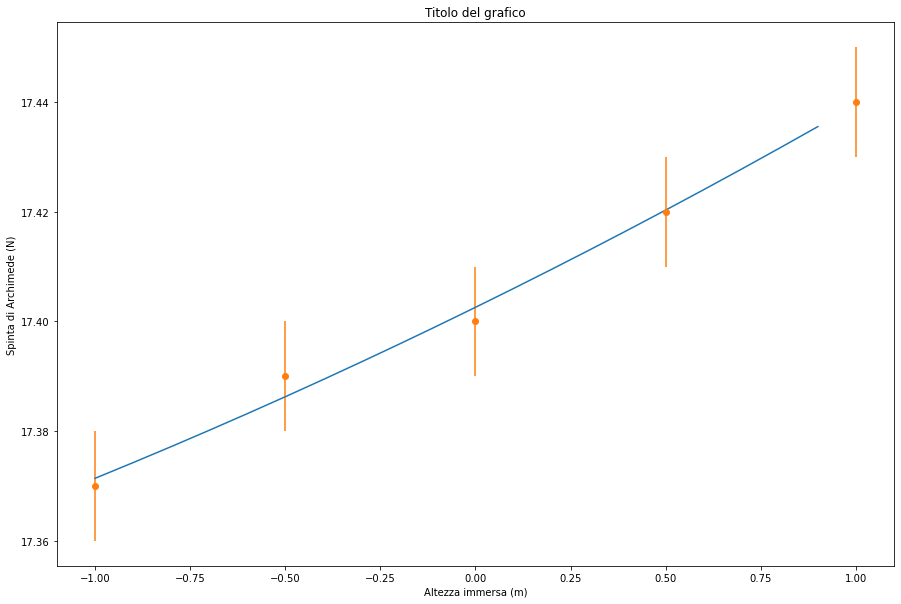

In [112]:
display(Markdown("### Calcolo delle derivate di X^2"))

s = expand((yy - cc*xx**2 - bb*xx - aa)**2)
display(s)
s_aa = diff(s,aa)
display(s_aa)
s_bb = diff(s,bb)
display(s_bb)
s_cc = diff(s,cc)
display(s_cc)

yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_x2_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_x3_over_yerrSq = (xdata*xdata*xdata/yerrSq).sum()
sum_x4_over_yerrSq = (xdata*xdata*xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()
sum_x2y_over_yerrSq = (xdata*xdata*ydata/yerrSq).sum()

##Calcolo matrice D e matrice inversa

matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq,sum_x2_over_yerrSq],
                [sum_x_over_yerrSq,sum_x2_over_yerrSq,sum_x3_over_yerrSq],
                [sum_x2_over_yerrSq,sum_x3_over_yerrSq,sum_x4_over_yerrSq]])
matD_inv = np.linalg.inv(matD)
print()
display(matD)
print()
display(matD_inv)
print()
display(Markdown("### Check D^(-1)D = I"))
print()
display(np.dot(matD,matD_inv))
print()
#Calcolo matrice B

matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq,sum_x2y_over_yerrSq])
print()
display(matB)
print()
display(np.dot(matD_inv,matB))
print()

##Calcolo parametri fit (Attenzione a cifre significative e unita' di misura!!)
display(Markdown("### Parametri fit"))

a, b, c = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1],np.dot(matD_inv,matB)[2]
print(" a = ", a)
print(" b = ", b)
print(" c = ", c)
print()
display(Markdown("### Varianze ed errori sui parametri"))
print()
vara, varb, varc= matD_inv[0,0], matD_inv[1,1], matD_inv[2,2]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
print(" errore su a = ",erra)
print(" errore su b = ",errb)
print(" errore su c = ",errc)
print()
display(Markdown("### Chi quadro"))
print()
scarto1 = (ydata-a-b*xdata-c*xdata*xdata)/yerr
scarto2 = (ydata-a-b*xdata-c*xdata*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-3)).sum()
errst = np.sqrt(errstSq)
print(" Chi^2 = ",chi2)
print (" errore standard della stima = ",errst)
print()
display(Markdown("### Calcolo determinazione"))
print()
sum_y = (ydata).sum()
ymean=sum_y/npoint
ameany = ydata-ymean
vary = (ameany*ameany).sum()
yatteso =a+b*xdata+c*xdata*xdata
scarto3=yatteso-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print("coefficiente determinazione = ",detercoeff)

#CSV Fit
#First column merging with um
aatext='Parametro a ['+ unma+ ']'
print(aatext)
abtext='Parametro b ['+ unmb+ ']'
print(abtext)
actext='Parametro c ['+ unma+ ']'
print(actext)
erratext='Errore su a ['+ unmb+ ']'
print(erratext)
errbtext='Errore su b ['+ unmb+ ']'
print(errbtext)
errctext='Errore su c ['+ unmb+ ']'
print(errctext)
determtext='Coeff. di determinaz.'
print(errctext)
#Creating Arrays
corrhead = np.array(['Variabile','Valore'])

aa = np.array([aatext,c])
ab = np.array([abtext,b])
ac = np.array([actext,a])
aerra = np.array([erratext,errc])
aerrb = np.array([errbtext,errb])
aerrc = np.array([errctext,erra])

adeterm = np.array([determtext,detercoeff])
#writing csv
with open('corr.csv', mode='w') as corr:
    corr_writer = csv.writer(corr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    corr_writer.writerow(corrhead)
    corr_writer.writerow(aa)
    corr_writer.writerow(ab)
    corr_writer.writerow(ac)
    corr_writer.writerow(aerra) 
    corr_writer.writerow(aerrb) 
    corr_writer.writerow(aerrc) 
    corr_writer.writerow(adeterm)

#Plot
#-----------------------------------------------------------------------------------------------------

#Chi2 logic test
def check(c2,cr,su):
    if c2>cr:
        return 'Rigettato'
    elif c2<cr and c2>su:
        return 'Accettato'
    elif c2<su:
        return 'Sospetto'
    else:
        print('Check error')
        return 0
    
#Numero GDL
n=len(xdata)-3
print('len',len(xdata))
crit=scipy.stats.chi2.ppf(1-alpha , df=n)
sus=scipy.stats.chi2.ppf(alpha , df=n)

print('Chi quadro critico, ',crit)
print('Chi quadro sospetto, ',sus)
es=check(chi2,crit,sus)
print("Esito del test, ",es)

#Arrays for csv
asig = np.array(['Livello di significatività',alpha])
agdl = np.array(['Gradi di libertà',crit])
acrit = np.array(['Chi quadro critico',crit])
chi = np.array(['Chi quadro ',chi2])
asus = np.array(['Chi quadro sospetto',sus])
esito = np.array(['Esito',es])
head = np.array(['Variabile','Valore'])
#CSV writing
with open('fit.csv', mode='w') as fit:
    fit_writer = csv.writer(fit, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    fit_writer.writerow(head)
    fit_writer.writerow(asig)
    fit_writer.writerow(agdl)
    fit_writer.writerow(chi)    
    fit_writer.writerow(acrit)
    fit_writer.writerow(asus)
    fit_writer.writerow(esito)   
    
print('')
print('')

dfcorr = pd.read_csv ('corr.csv')
dffit = pd.read_csv ('fit.csv')


###PLOT
randfig=str(randint(0, 9999))
namefig='fig'+randfig+'.png'
plt.savefig(namefig)

fig, ax = plt.subplots()
thickxdata = np.arange(-1.,1.,0.1)
ax.set_xlabel(customxlabel)
ax.set_ylabel(customylabel)
ax.set_title(customtitle)
# ax.set_xlim(0, 5); ay.set_xlim(0, 5) PEr cambiare range plot
plt.plot(thickxdata,c*thickxdata*thickxdata+b*thickxdata+a)
plt.errorbar(xdata,ydata,yerr=yerr,fmt='o')
display(Markdown('### Dataframe di correlazione e fit'))
print('\n')
display_side_by_side(dfcorr,dffit)
print('')
print('')
indexcorr='corr'+str(randint(0, 1000))
indexfit='fit'+str(randint(0, 1000))
    
print('')
print('')
print(dfcorr.to_latex(index=False, caption='Dati relativi al fit lineare', bold_rows=True, label=indexcorr, position='ht'))
    
print('')
print('')
print(dffit.to_latex(index=False,  caption='Dati relativi al test del $\chi^2$', bold_rows=True, label=indexfit, position='ht'))

    
print('')
print('')

#LaTeX image handling
display(Markdown('### Figura in LaTeX'))
print("""
\\begin{figure}[!ht]
\includegraphics[width=12cm]{""",namefig,"""}
\centering
\caption{Fit lineare di""",customxlabel,""" e """,customylabel,"""}
\end{figure}

""")


 errore su a =  0.006969320524371696
 errore su b =  0.006324555320336759
 errore su c =  0.010690449676496976


 Chi^2 =  0.22857142857152032
 errore standard della stima =  0.003380617018914745


coefficiente determinazione =  0.9960784162656128


Parametro a [cm]
Parametro b [N]
Parametro c [cm]
Errore su a [N]
Errore su b [N]
Errore su c [N]
Errore su c [N]
len 5
Chi quadro critico,  5.991464547107979
Chi quadro sospetto,  0.10258658877510106
Esito del test,  Accettato




### Dataframe di correlazione e fit

,Variabile,Valore
0,Parametro a [cm],0.002857
1,Parametro b [N],0.034000
2,Parametro c [cm],17.402571
3,Errore su a [N],0.010690
4,Errore su b [N],0.006325
5,Errore su c [N],0.006969
6,Coeff. di determinaz.,0.996078
,Variabile,Valore
0,Livello di significatività,0.05
1,Gradi di libertà,5.991464547107979






\begin{table}[ht]
\centering
\caption{Dati relativi al fit lineare}
\label{corr286}
\begin{tabular}{lr}
\toprule
            Variabile &    Valore \\
\midrule
     Parametro a [cm] &  0.002857 \\
      Parametro b [N] &  0.034000 \\
     Parametro c [cm] & 17.402571 \\
      Errore su a [N] &  0.010690 \\
      Errore su b [N] &  0.006325 \\
      Errore su c [N] &  0.006969 \\
Coeff. di determinaz. &  0.996078 \\
\bottomrule
\end{tabular}
\end{table}



\begin{table}[ht]
\centering
\caption{Dati relativi al test del $\chi^2$}
\label{fit209}
\begin{tabular}{ll}
\toprule
                 Variabile &              Valore \\
\midrule
Livello di significatività &                0.05 \\
          Gradi di libertà &   5.991464547107979 \\
               Chi quadro  & 0.22857142857152032 \\
        Chi quadro critico &   5.991464547107979 \\
       Chi quadro sospetto & 0.10258658877510106 \\
                     Esito &           Accettato \\
\bottomrule
\end{tabular}
\end{table}





### Figura in LaTeX


\begin{figure}[!ht]
\includegraphics[width=12cm]{ fig9077.png }
\centering
\caption{Fit lineare di Altezza immersa (m)  e  Spinta di Archimede (N) }
\end{figure}




<Figure size 1080x720 with 0 Axes>

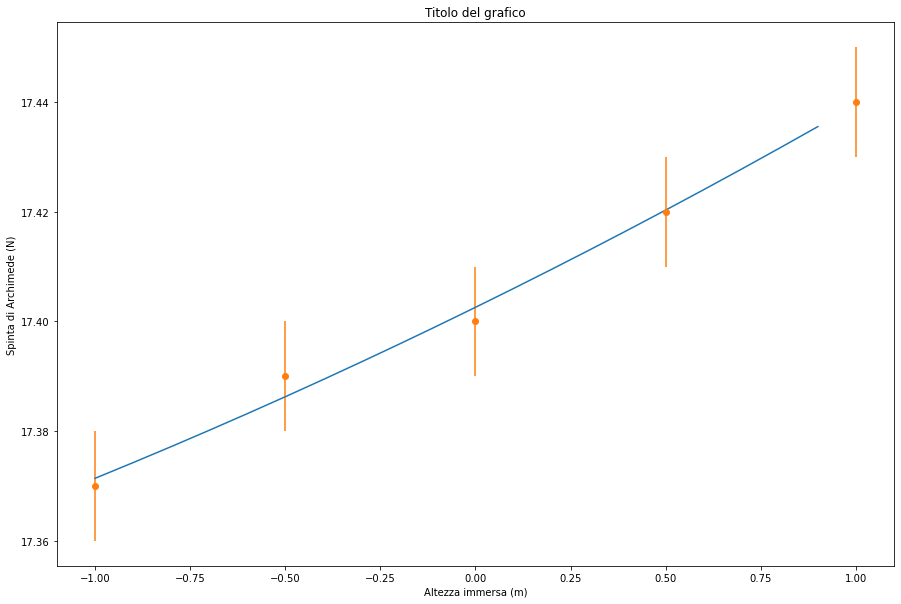